<a href="https://colab.research.google.com/github/amceetech-dev/Netflix-Dataset-Analysis/blob/main/Netflix_Data_set_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Netflix Datatset has the information about Tv Shows and Movies available on Netflix till 2021

The dataset is collected from Flaxible which is third-party Netflix Search Engine, and also avialable on Kaggle for free


Importing Dependencies

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data Collection and Data Processing

In [145]:
# Loading the dataset
netflix_df = pd.read_csv('/content/Netflix_dataset.csv')

In [146]:
netflix_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [147]:
netflix_df.shape

(7789, 11)

In [148]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Task.1. Is there any Duplicate Record in this dataset? If yes, then remove the duplicate records.

In [149]:
netflix_df.duplicated().sum()

2

In [150]:
netflix_df[netflix_df.duplicated()]
#  To show the 2 duplicates

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [151]:
# Removing the duplicates
netflix_df.drop_duplicates(inplace=True)

Task.2. Is there any Null Value present in any column ? Show with heat-map.

In [152]:
netflix_df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


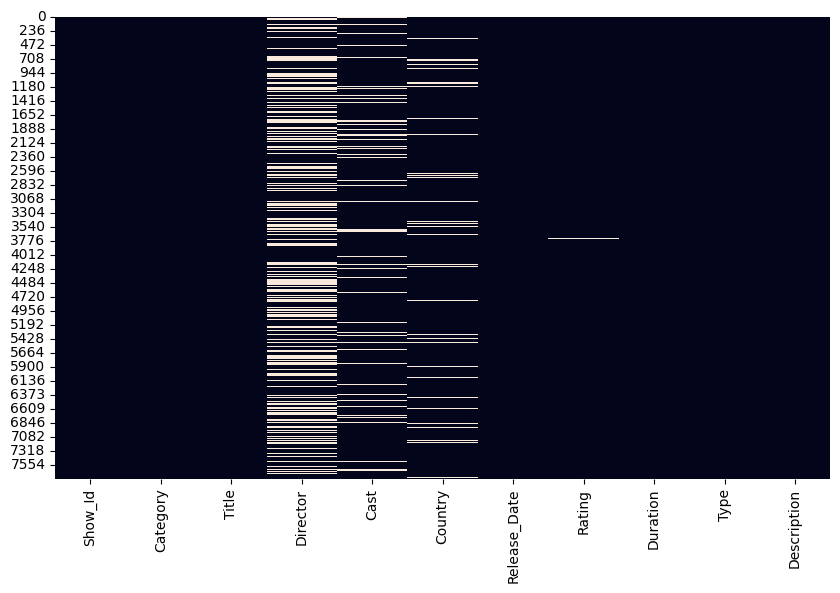

In [153]:
plt.figure(figsize=(10, 6))
sns.heatmap(netflix_df.isnull(), cbar=False)
plt.show()

Q.1. For 'House of Card', what is the Show Id and Who is the Director of this show?

In [154]:
netflix_df[netflix_df.Title == 'House of Cards']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [155]:
# Showing the Show ID and Director
netflix_df[netflix_df.Title == 'House of Cards'][['Title', 'Show_Id', 'Director']]

,Title,Show_Id,Director
2832,House of Cards,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


Q.2 In which year highest number of the TV Shows & Movies were released? Show with Bar Graph.

In [156]:
# datatype casting
netflix_df['Date_N'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce')

In [157]:
netflix_df.Date_N.dt.year.value_counts()

,count
Date_N,
2019.0,2136
2020.0,2008
2018.0,1661
2017.0,1201
2016.0,432
2021.0,117
2015.0,79
2014.0,24
2011.0,13


Bar plot

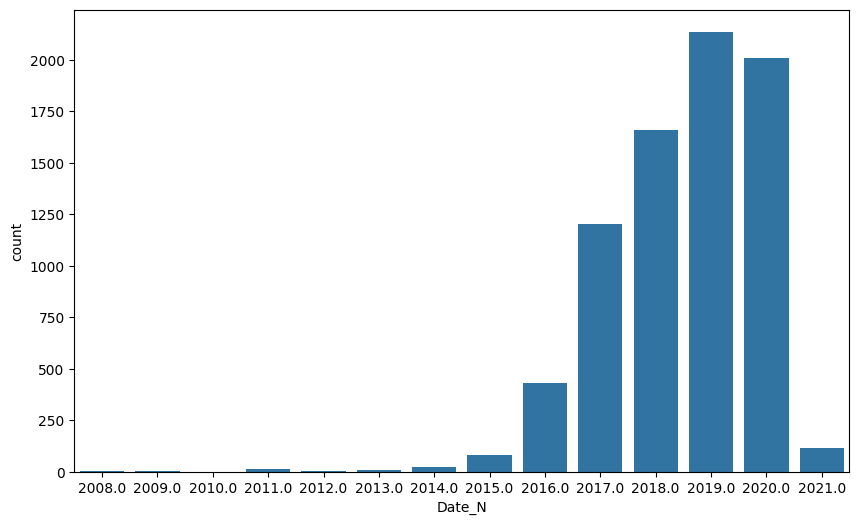

In [158]:
plt.figure(figsize=(10, 6))
sns.barplot(netflix_df.Date_N.dt.year.value_counts())

plt.show()

Q.3. How many Movies & Tv Shows are in the dataset? Show with Bar Graph

In [159]:
netflix_df.groupby('Category').Category.count()

,Category
Category,
Movie,5377
TV Show,2410


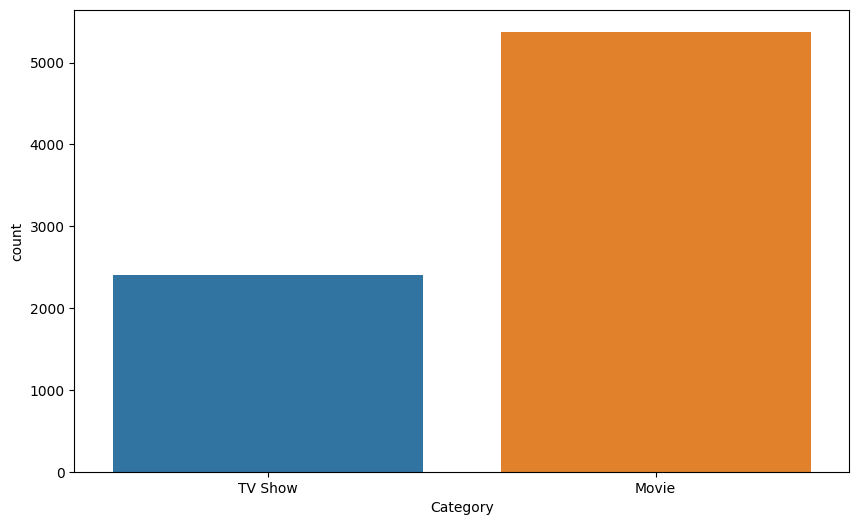

In [160]:
plt.figure(figsize=(10,6))
sns.countplot(x=netflix_df['Category'], hue=netflix_df['Category'], palette='tab10')
plt.show()

Q.4. Show all the Movies that were released in year 2000

In [161]:
netflix_df[(netflix_df.Category =='Movie') & (netflix_df.Date_N.dt.year == 2000)]
# No Movie was released on year 2000

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N


Q.5. Show only the Titles of all Tv Shows that were released in India only.

In [162]:
netflix_df[(netflix_df.Category =='TV Show') & (netflix_df.Country == 'India')]['Title']

,Title
86,21 Sarfarosh: Saragarhi 1897
132,7 (Seven)
340,Agent Raghav
364,Akbar Birbal
533,Anjaan: Rural Myths
...,...
6249,The Creative Indians
6400,The Golden Years with Javed Akhtar
6469,The House That Made Me
7294,Typewriter


Q.6. Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix

In [163]:
netflix_df.Director.value_counts().head(10)

,count
Director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12
Steven Spielberg,10
David Dhawan,9


Q.7. Show all the Records, where "Category is Movies and Type is Comedies or "Country is United Kingdom".

In [164]:
netflix_df[(netflix_df.Category == 'Movie') & ( (netflix_df.Type =='Comedies') | (netflix_df.Country == 'United Kingsom'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China","February 14, 2020",R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020-02-14
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,"January 26, 2018",TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...
7341,s7340,Movie,Undercover Brother 2,Leslie Small,"Michael Jai White, Vince Swann, Barry Bostwick...",United States,"November 5, 2019",R,85 min,Comedies,When a beloved secret agent falls deep into a ...,2019-11-05
7590,s7589,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,"January 22, 2018",R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018-01-22
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States","May 13, 2017",PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017-05-13
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019-05-10


Q.8. In how many movies/shows, Tom Cruise was cast ?

In [165]:
# Second method
netflix_df[netflix_df.Cast == 'Tom Cruise'].shape[0]

0

Second method (best method when there is multiple a element in a column  )

In [166]:
# The second method does not work if it has missing values so we have to drop missing values
new_data = netflix_df.dropna()

In [167]:

new_data[new_data.Cast.str.contains('Tom Cruise')].shape[0]

2

Q.9 What are the different Ratings defined by Netflix

In [168]:
netflix_df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

Q.9.1 How many Movies got the 'TV-14' rating, in Canada ?

In [169]:
netflix_df[(netflix_df.Category == 'Movie') & (netflix_df.Rating == 'TV-14') & (netflix_df.Country == 'Canada')].shape[0]

11

Q.9.2 How many Tv Show got the 'R' rating, after year 2018 ?

In [170]:
netflix_df[(netflix_df.Category == 'TV Show') & (netflix_df.Rating == 'R') & (netflix_df.Date_N.dt.year > 2018)].shape[0]

1

Q. What is the maximum duration of a Movie/Show on Netflix

In [171]:
netflix_df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23


In [174]:
# Split the Values to get the numerical values and store them in another column "duration_num"
netflix_df['duration_num'] = netflix_df['Duration'].apply(lambda x: x.split()[0])

In [176]:
# cast the data type from str to int
netflix_df['duration_num'] = netflix_df['duration_num'].astype('int')


In [179]:
netflix_df['duration_num'].max()

312

Q.11. Which individual country has the Highest No. of Tv Shows ?

In [186]:
netflix_df[(netflix_df.Category == 'TV Show')]['Country'].value_counts().head(1)

,count
Country,
United States,705


Q.12. How can we sort the dataset by Year ?

In [188]:
netflix_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,duration_num
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,4
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,123


In [190]:
# Sorting in Ascending Order
netflix_df.sort_values(by='Date_N')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,duration_num
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,81
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,1
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,104
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,29
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,s6951,TV Show,The Tudors,NaN,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom","January 8, 2018",TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...,NaT,4
6998,s6997,TV Show,The West Wing,NaN,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,"December 25, 2015",TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...,NaT,7
7448,s7447,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,"August 1, 2017",TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",NaT,3
7524,s7523,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,"March 31, 2017",TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...,NaT,2


In [191]:
#  Sorting in descending order
netflix_df.sort_values(by='Date_N', ascending=False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,duration_num
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States","January 16, 2021",PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",2021-01-16,108
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand","January 16, 2021",R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",2021-01-16,94
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,"January 16, 2021",TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,2021-01-16,103
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,"January 15, 2021",PG,142 min,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must...",2021-01-15,142
3472,s3473,TV Show,Kuroko's Basketball,NaN,"Kensho Ono, Yuki Ono, Chiwa Saito, Yoshimasa H...",Japan,"January 15, 2021",TV-MA,1 Season,"Anime Series, International TV Shows, Teen TV ...",Five middle school basketball stars went to se...,2021-01-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,s6951,TV Show,The Tudors,NaN,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom","January 8, 2018",TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...,NaT,4
6998,s6997,TV Show,The West Wing,NaN,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,"December 25, 2015",TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...,NaT,7
7448,s7447,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,"August 1, 2017",TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",NaT,3
7524,s7523,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,"March 31, 2017",TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...,NaT,2


Q.13 Find all the instances where:
Category is 'Movies' and Type is 'Dramas'

or

Category is 'TV Show' & Type is 'Kids TV'

In [195]:
netflix_df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,duration_num
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,4
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,93


In [211]:
# 'Movies' and Type is 'Dramas'
netflix_df[(netflix_df.Category =='Movie') & (netflix_df.Type == 'Dramas')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,duration_num
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,123
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,119
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,110
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,95
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,"December 1, 2016",TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be...",2016-12-01,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,s7416,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",2017-07-24,110
7422,s7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,"September 5, 2020",R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h...",2020-09-05,97
7449,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019-06-19,99
7465,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,2019-03-02,109


In [212]:
# Category is 'TV Show' & Type is 'Kids TV'
netflix_df[(netflix_df.Category =='TV Show') & (netflix_df.Type == "Kids' TV")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,duration_num
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020-10-01,2
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,1
434,s435,TV Show,Alphablocks,NaN,"Teresa Gallagher, David Holt, Lizzie Waterworth",United Kingdom,"May 25, 2020",TV-Y,5 Seasons,Kids' TV,The letters of the alphabet come to life in Al...,2020-05-25,5
598,s599,TV Show,Ask the StoryBots,NaN,"Judy Greer, Erin Fitzgerald, Fred Tatasciore, ...",United States,"August 2, 2019",TV-Y,3 Seasons,Kids' TV,Five curious little creatures track down the a...,2019-08-02,3
706,s707,TV Show,Bal Ganesh,Vijay S. Bhanushali,"Meghna Erande Joshi, Parminder Ghumman",NaN,"March 31, 2020",TV-Y7,1 Season,Kids' TV,"Watch Ganesh destroy demons, disarm invaders a...",2020-03-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017-06-16,2
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018-06-23,1
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018-06-07,1
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019-02-22,2
